In [76]:
# load the packages
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv(".\Datasets\ecommerce_data.csv", encoding="UTF-8")

In [3]:
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [4]:
# There are 4 categories in "time_of_day" column
df["time_of_day"].value_counts()

3    140
2    127
1    120
0    113
Name: time_of_day, dtype: int64

In [5]:
# rows x columns
df.shape

(500, 6)

In [6]:
# Normalize the data
df.iloc[:,2] = (df.iloc[:,2] - df.iloc[:,2].mean()) / df.iloc[:,2].std()

In [7]:
# Input and output variable
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

In [8]:
# shape of X
X.shape

(500, 5)

In [9]:
# Apply one hot encoding to "time_of_day" column
# 4 categories
N = X.shape[0]
D = 4

# One hot encoded columns
Z = np.zeros((N,D))
Z[np.arange(N), X[:,-1].astype(int)] = 1

# Join this Z to X
X = np.concatenate((X[:,:-1], Z), axis=1)

In [10]:
X.shape

(500, 8)

In [11]:
# Adding Bias term
ones = np.ones(N)
X = np.vstack((X.T, ones)).T

# Only select the 0 and 1 class only in the dataset
X = X[y<=1]
y = y[y<=1]

In [81]:
# Shuffle the data and split into Train and Test
X, y = shuffle(X, y)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, train_size=0.5, random_state=1)

In [82]:
Xtrain.shape

(199, 9)

In [83]:
def update_rule(w,lr,x, error):
    w = w - lr*np.dot(x.T, error)
    return w

In [154]:
def GradientDescent(w, x_train, x_test, y_train, y_test, lr, iterations):
    
    train_cost, test_cost = [], []   
    for i in range(iterations):
        Yhat = sigmoid(np.dot(x_train,w))
        Yhat_test = sigmoid(np.dot(x_test,w))
        error = Yhat - y_train
        w = update_rule(w, lr, x_train, error)
        
        train_cost.append(cost(y_train, Yhat))
        test_cost.append(cost(y_test, Yhat_test))
    
    Train_pred = predictions(sigmoid(np.dot(Xtrain, w)))
    Test_pred = predictions(sigmoid(np.dot(Xtest, w)))
    
    return train_cost, test_cost, Train_pred, Test_pred

In [155]:
def cost(y, Yhat):
    return -np.mean(y*np.log(Yhat) + (1-y)*np.log(1-Yhat))

In [156]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [157]:
def predictions(z):
    return np.round(z)

In [158]:
def accuracy(y, Yhat):
    return np.mean(y==Yhat)

In [159]:
w = np.random.randn(Xtrain.shape[1]) / np.sqrt(Xtrain.shape[1])
learning_rate = 0.01
iterations = 50

train_cost, test_cost, Train_pred, Test_pred = GradientDescent(w, Xtrain, Xtest, Ytrain, Ytest, learning_rate, iterations)

In [160]:
print("Train Accuracy: {}%".format(accuracy(Ytrain, Train_pred)*100))
print("Test Accuracy: {}%".format(accuracy(Ytest, Test_pred)*100))

Train Accuracy: 96.98492462311557%
Test Accuracy: 96.4824120603015%


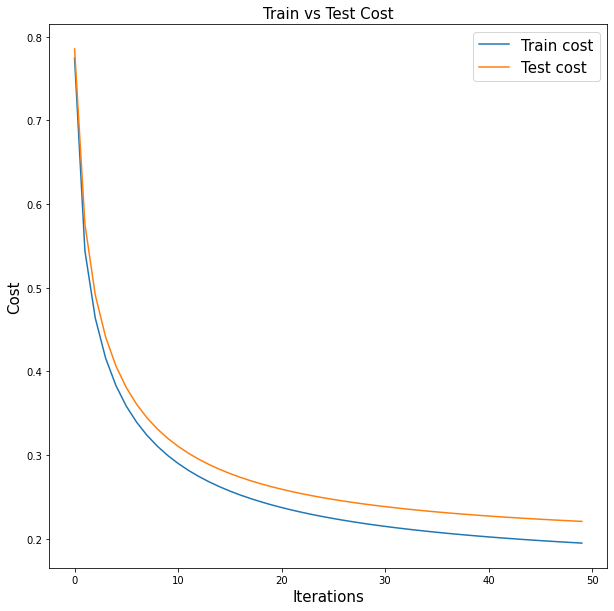

In [165]:
plt.figure(figsize=(10,10))
plt.title("Train vs Test Cost", fontsize=15)
plt.plot(train_cost, label="Train cost")
plt.plot(test_cost, label="Test cost")
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Cost", fontsize=15)
plt.legend(fontsize=15)
plt.show()